In [22]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [23]:
from datetime import date, timedelta

days = 100

today = date.today()
end_date = today.strftime("%Y-%m-%d")

start_date = today - timedelta(days=days)
start_date = start_date.strftime("%Y-%m-%d")

In [24]:
import yfinance as yf
import pandas as pd

data = yf.download('BTC-USD', start=start_date, end=end_date, progress=False)
data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-10-30,72339.539062,72905.296875,71411.734375,72715.367188,40646637831
2024-10-31,70215.187500,72662.312500,69590.500000,72335.046875,40627912076
2024-11-01,69482.468750,71559.015625,68779.703125,70216.898438,49989795365
2024-11-02,69289.273438,69867.351562,69033.718750,69486.023438,18184612091
2024-11-03,68741.117188,69361.656250,67482.523438,69296.382812,34868307655
...,...,...,...,...,...
2025-02-02,97688.976562,101430.664062,96216.078125,100661.539062,63091816853
2025-02-03,101405.421875,102514.171875,91242.890625,97681.101562,115400897748


In [25]:
data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [26]:
data["Date"] = data.index
data.reset_index(drop=True, inplace=True)
data

Price,Close,High,Low,Open,Volume,Date
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,72339.539062,72905.296875,71411.734375,72715.367188,40646637831,2024-10-30
1,70215.187500,72662.312500,69590.500000,72335.046875,40627912076,2024-10-31
2,69482.468750,71559.015625,68779.703125,70216.898438,49989795365,2024-11-01
3,69289.273438,69867.351562,69033.718750,69486.023438,18184612091,2024-11-02
4,68741.117188,69361.656250,67482.523438,69296.382812,34868307655,2024-11-03
...,...,...,...,...,...,...
95,97688.976562,101430.664062,96216.078125,100661.539062,63091816853,2025-02-02
96,101405.421875,102514.171875,91242.890625,97681.101562,115400897748,2025-02-03
97,97871.820312,101745.617188,96208.109375,101398.718750,73002130211,2025-02-04


In [27]:
!pip install matplotlib

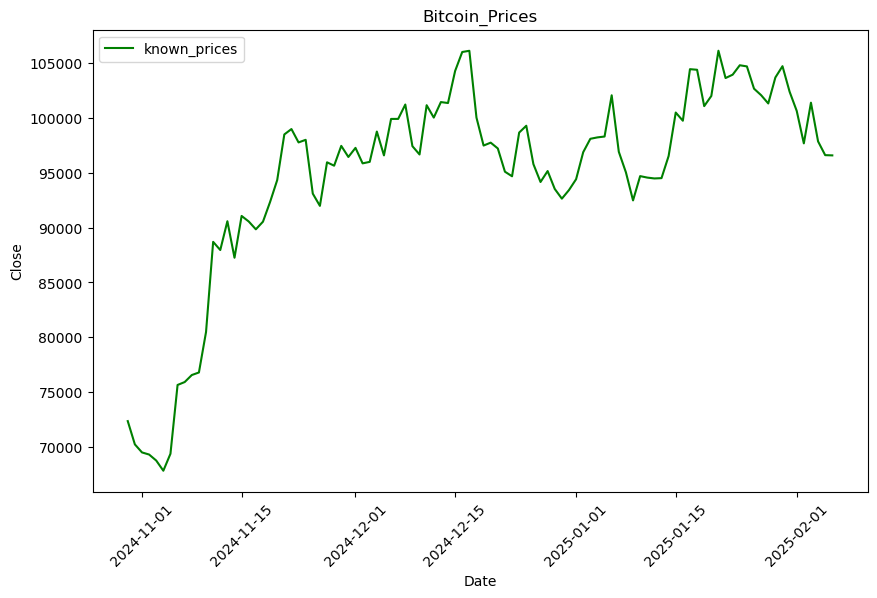

In [28]:
import matplotlib.pyplot as plt

dates = data['Date']
prices = data['Close']

plt.figure(figsize=(10,6))
plt.plot(dates, prices, color='green', label='known_prices')

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Bitcoin_Prices')

plt.xticks(rotation=45)
plt.legend()

plt.show()

In [29]:
import numpy as np

def create_dataset(serie, window_size=20):
    data_x, data_y = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]
        data_x.append(a)
        data_y.append([serie[i+ window_size, 0]])
    return np.array(data_x), np.array(data_y)

In [30]:
from sklearn.preprocessing import MinMaxScaler
window_size=20

closedf = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(closedf)

x, y =create_dataset(closedf, window_size)

In [31]:
x

array([[0.11811817, 0.06270236, 0.04358867, ..., 0.59337713, 0.57478761,
        0.59296404],
       [0.06270236, 0.04358867, 0.03854898, ..., 0.57478761, 0.59296404,
        0.63994877],
       [0.04358867, 0.03854898, 0.02424978, ..., 0.59296404, 0.63994877,
        0.69200866],
       ...,
       [0.74925579, 0.85282877, 0.83332725, ..., 0.902406  , 0.85677856,
        0.77938327],
       [0.85282877, 0.83332725, 0.95606529, ..., 0.85677856, 0.77938327,
        0.87633041],
       [0.83332725, 0.95606529, 0.95465746, ..., 0.77938327, 0.87633041,
        0.78415293]])

In [32]:
y

array([[0.63994877],
       [0.69200866],
       [0.80066291],
       [0.81352167],
       [0.78168678],
       [0.78785714],
       [0.6597352 ],
       [0.63059776],
       [0.73434724],
       [0.72625895],
       [0.77344993],
       [0.74703868],
       [0.76870921],
       [0.73181099],
       [0.7353811 ],
       [0.80754452],
       [0.75080851],
       [0.83760026],
       [0.83766874],
       [0.87191128],
       [0.77269853],
       [0.7529439 ],
       [0.87026827],
       [0.84079029],
       [0.87773477],
       [0.87548384],
       [0.9518043 ],
       [0.99695976],
       [0.99985225],
       [0.84075218],
       [0.77421763],
       [0.7811298 ],
       [0.76727285],
       [0.71197606],
       [0.70105398],
       [0.80513319],
       [0.82138741],
       [0.72999047],
       [0.68745319],
       [0.71351493],
       [0.67089817],
       [0.64775949],
       [0.66826287],
       [0.69410247],
       [0.75845966],
       [0.79029903],
       [0.79365882],
       [0.795

In [33]:
len(y)

79

In [34]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, random_state=0)

In [35]:
!pip install tensorflow

In [36]:
from tensorflow import keras

In [37]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM

model = Sequential()
model.add(Input(shape=(window_size, 1)))
model.add(LSTM(units=32, dropout=0.1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [38]:
print(x_train.shape)  # Should be (N, ...) where N is the number of samples
print(y_train.shape)  # Should be (N, ...) with the same N as x_train

(59, 20)
(20, 20)


In [39]:
def create_dataset(serie, window_size=20):
    data_x, data_y = [], []
    for i in range(len(serie)-window_size-1):
        a = serie[i:(i+window_size), 0]
        data_x.append(a)
        data_y.append([serie[i+window_size, 0]])
    return np.array(data_x), np.array(data_y)

In [40]:
x_train, y_train = create_dataset(closedf, window_size=20)
print(x_train.shape, y_train.shape)

(79, 20) (79, 1)


In [41]:
print(len(x_train), len(y_train))  # Should be the same
print(len(x_test), len(y_test))    # Should be the same

79 79
59 20


In [42]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=8)

Epoch 1/10
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5459 - mse: 0.5459

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 59
'y' sizes: 20


In [43]:
print(x.shape, y.shape)

(79, 20) (79, 1)


In [46]:
x = x[:len(y)]

In [47]:
print(x.shape, y.shape)

(79, 20) (79, 1)


In [48]:
x = x.reshape((x.shape[0], x.shape[1], 1))  # (79, 20, 1)


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Ensure x has the correct shape
x = x.reshape((x.shape[0], x.shape[1], 1))  # (79, 20, 1)

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(20, 1)))  # window_size must match x.shape[1]
model.add(LSTM(units=32, dropout=0.1, activation='relu'))
model.add(Dense(1))  # Linear activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

# Train the model
history = model.fit(x, y, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - loss: 0.5576 - mse: 0.5576 - val_loss: 0.6652 - val_mse: 0.6652
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4975 - mse: 0.4975 - val_loss: 0.5913 - val_mse: 0.5913
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4614 - mse: 0.4614 - val_loss: 0.5137 - val_mse: 0.5137
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3728 - mse: 0.3728 - val_loss: 0.4396 - val_mse: 0.4396
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3226 - mse: 0.3226 - val_loss: 0.3583 - val_mse: 0.3583
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2750 - mse: 0.2750 - val_loss: 0.2711 - val_mse: 0.2711
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1861 - mse: 0.1861 - val_loss: 0.1756 - val_mse: 0.1756
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1234 - mse: 0.1234 - val_loss: 0.0745 - val_mse: 0.0745
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0523 - mse: 0.0523 -

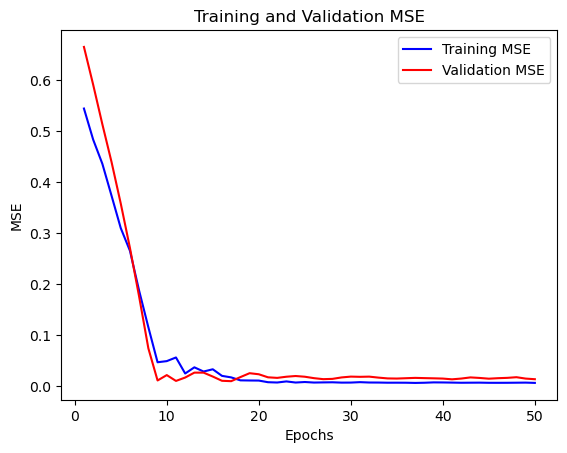

In [109]:
import matplotlib.pyplot as plt

train_mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(train_mse) + 1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, val_mse, 'r', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [113]:
predictions = model.predict(x_test)
print(f'Predictions: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
Predictions: [[0.699738  ]
 [0.70545405]
 [0.69470245]
 [0.73247707]
 [0.70829564]
 [0.77975893]
 [0.85543   ]
 [0.79787964]
 [0.6975479 ]
 [0.70855033]
 [0.8604916 ]
 [0.74847305]
 [0.71422905]
 [0.7102405 ]
 [0.8872474 ]
 [0.73023   ]
 [0.7136076 ]
 [0.78162175]
 [0.74405676]
 [0.748169  ]]


ValueError: x and y must have same first dimension, but have shapes (10,) and (20, 1)

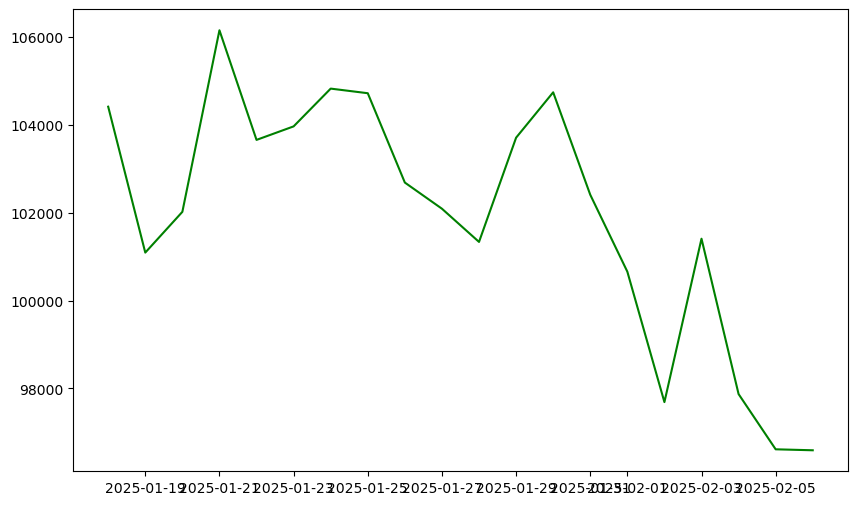

In [120]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predictions, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predictions[0][0]], color='blue')

plt.xlabel('Date', rotation=90)
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=90)

plt.legend()

plt.show()

In [133]:
pred_steps = 10

predicted_prices=[]

x_pred=[x[-1]]

x_pred = np.array(x_pred)

for _ in range(pred_steps):
    
    prediction = model.predict([x_pred])
    
    price=prediction[0]
    
    predicted_prices.append(price)
    
    x_pred = np.append(x_pred, [price], axis=1)
    
    x_pred = x_pred[:, 1:]

predicted_prices = np.array(predicted_prices, dtype=object)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_45
Received: inputs=('Tensor(shape=<unknown>)',)
  warnings.warn(msg)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=('tf.Tensor(shape=<unknown>, dtype=float32)',)
  • training=False
  • mask=('None',)

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

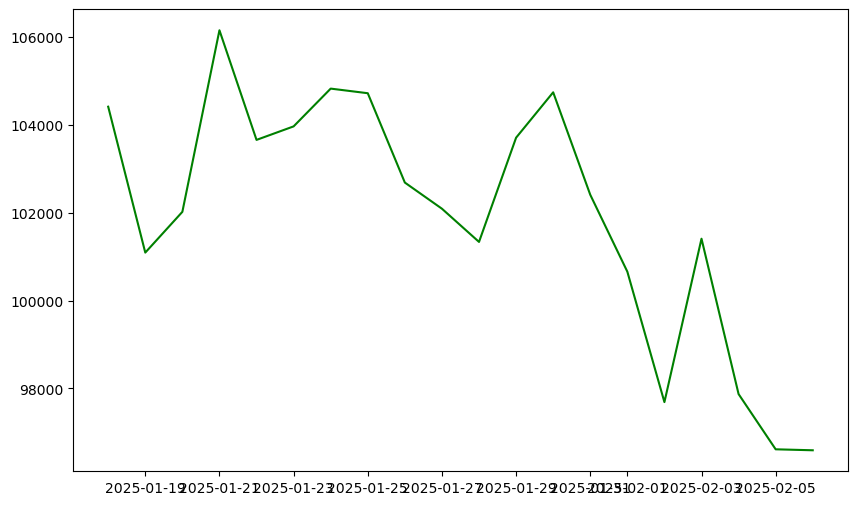

In [135]:
import matplotlib.pyplot as plt
previous_days=20

dates_known = data["Date"].iloc[-previous_days:].values

known_prices = data["Close"].iloc[-previous_days:].values

dates_pred = pd.date_range(start=today + timedelta(days=1), periods=pred_steps).values

plt.figure(figsize=(10, 6))

plt.plot(dates_known, known_prices, color='green', label='Known Prices')

plt.plot(dates_pred, predicted_prices, color='red', label='Predicted Prices')

plt.plot([dates_known[-1], dates_pred[0]], [known_prices[-1], predicted_prices[0][0]], color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')

plt.xticks(rotation=45)

plt.legend()

plt.show()